In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
t = pd.read_excel('../result/metabo_mean.xlsx', index_col=0)
fba = pd.read_csv('../result/__fba__.csv', index_col=0)

In [3]:
d = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = d.columns
slope = pd.concat([d, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([21.78, 12.8, 16.84], columns=['Doubling Time'] , index=slope.columns).T])

In [4]:
# sorted(t.index)
# t.T['Succinic acid']

/Users/yoshitaka-i/.pyenv/versions/3.6.8/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


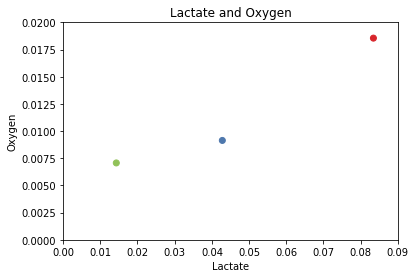

In [5]:
# Control Clone B Clone A
x = fba.loc['Lactate_output'] 
y = fba.loc['Oxygen_input'] 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.02)
ax.set_xlim(0, 0.09)
ax.set_title('Lactate and Oxygen')
ax.set_xlabel('Lactate')
ax.set_ylabel('Oxygen')
fig.show()

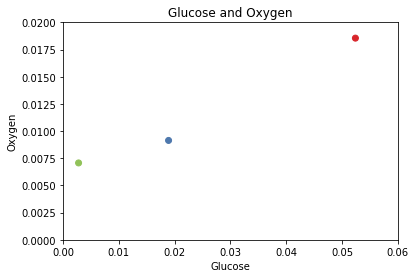

In [6]:
# Control Clone B Clone A
x = fba.loc['Glucose_input'] 
y = fba.loc['Oxygen_input'] 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.02)
ax.set_xlim(0, 0.06)
ax.set_title('Glucose and Oxygen')
ax.set_xlabel('Glucose')
ax.set_ylabel('Oxygen')
fig.show()

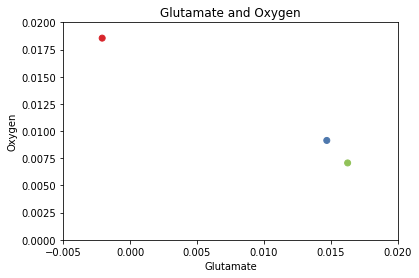

In [7]:
# Control Clone B Clone A
x = fba.loc['Glutamate_input'] 
y = fba.loc['Oxygen_input'] 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.02)
ax.set_xlim(-0.005, 0.02)
ax.set_title('Glutamate and Oxygen')
ax.set_xlabel('Glutamate')
ax.set_ylabel('Oxygen')
fig.show()

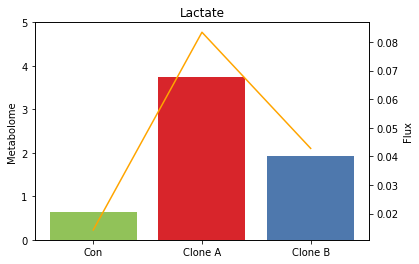

In [8]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], slope.T['Lactate'], color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 5)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['Lactate_output']), color='orange')
ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.07)
ax.set_title('Lactate')
plt.show()

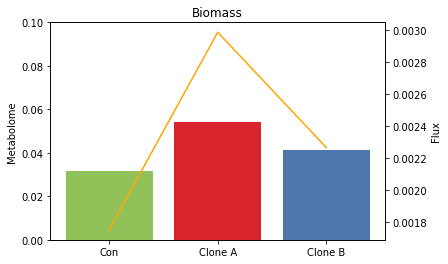

In [9]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], [np.log(2)/i for i in slope.T['Doubling Time']], color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.1)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['BIOMASS']), color='orange')
ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.004)
ax.set_title('Biomass')
plt.show()

In [10]:
b = t.loc['Succinic acid']

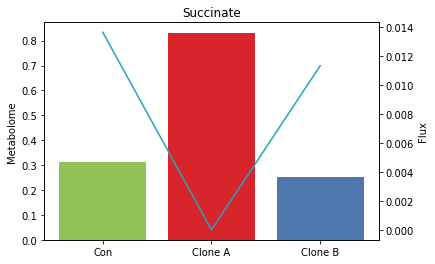

In [29]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
# ax.set_ylim(0, )
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R00405'])*(-1), color='#25a4b7')
ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.0003)
ax.set_title('Succinate')
plt.show()

In [12]:
b = []
for i in t.columns:
    b.append(sum(t.loc[['Cytosine', 'Uracil', 'Adenine', 'Guanine']][i]))

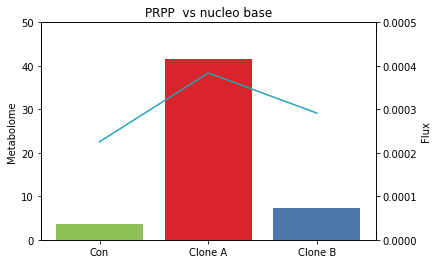

In [13]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 50)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R01049']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0005)
ax.set_title('PRPP  vs nucleo base')
plt.show()

In [14]:
b = t.loc['Ribulose 5-phosphate']

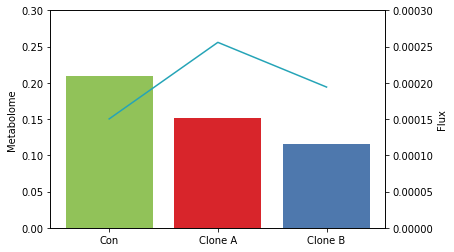

In [15]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R01529'])*(-1), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0003)
plt.show()

In [16]:
amino_acid = ['Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser']

In [17]:
b = sum(t.loc[amino_acid]['Control']), sum(t.loc[amino_acid]['Clone A']), sum(t.loc[amino_acid]['Clone B'])

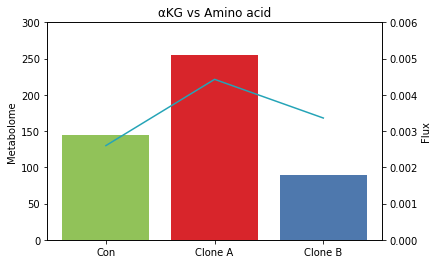

In [18]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 300)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['BIOMASS']*1.4836099999999999), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.006)
ax.set_title('αKG vs Amino acid')
plt.show()

In [19]:
b = t.loc['Ribose 5-phosphate']

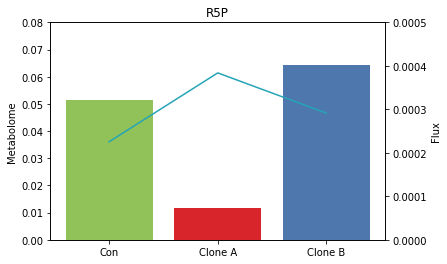

In [20]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.08)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.T['R01049']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.0005)
ax.set_title('R5P')
plt.show()

In [21]:
b = t.loc['Fructose 1,6-diphosphate']

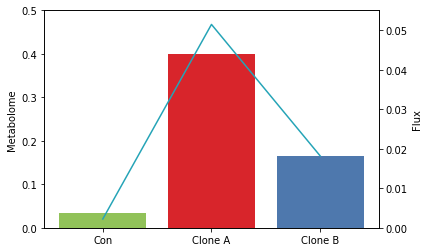

In [22]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.5)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R04779']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.055)
plt.show()

In [23]:
b = t.loc['Malic acid']

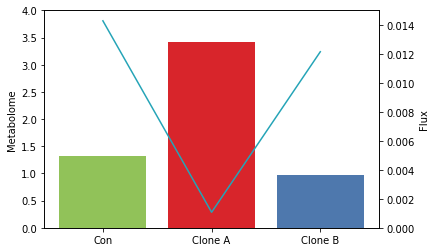

In [24]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 4)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R00342']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.015)
plt.show()

In [25]:
b = t.loc['Fructose 6-phosphate']

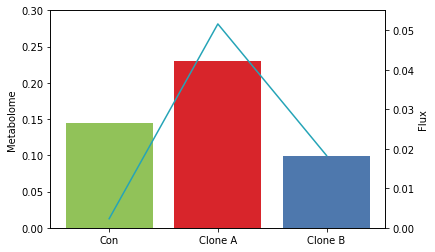

In [26]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.3)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R02740']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.055)
plt.show()

In [27]:
b = t.loc['Glucose 6-phosphate']

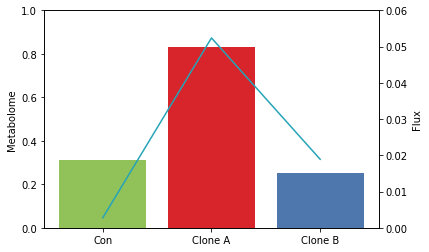

In [28]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], np.array(b), color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 1)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['R01786']), color='#25a4b7')
ax2.set_ylabel('Flux')
ax2.set_ylim(0, 0.06)
plt.show()